In [13]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
data = pd.read_csv("data.csv")
data
df_old = pd.DataFrame(data) #original set
x = np.array(df_old[['Date']]).reshape(-1,1)
y = np.array(df_old[['Time']])
z = (2023,2024,2025,2026,2027,2028,2029,2030)

In [16]:
reg = LinearRegression()
reg
reg.fit(x,y)

LinearRegression()

In [17]:
x_test=np.array(z).reshape(-1,1)

In [5]:
predicted_time = reg.predict(x_test)
n = list(range(1,33))
df_predicted = pd.DataFrame({'Time': [9.61492177,9.60749064,9.60005952,9.59262839,
                                      9.58519726,9.57776614,9.57033501,9.56290389],
                                'Date' : z})
df_pred = pd.concat([df_old, df_predicted]) #New dataset
df_pred.index = [n]
print(df_pred)

         Time         Athlete    Nationality           Location of race  Date
1   10.060000       Bob Hayes  United States               Tokyo, Japan  1964
2   10.030000       Jim Hines  United States            Sacramento, USA  1968
3   10.020000  Charles Greene  United States        Mexico City, Mexico  1968
4    9.950000       Jim Hines  United States        Mexico City, Mexico  1968
5    9.930000    Calvin Smith  United States      Colorado Springs, USA  1983
6    9.830000     Ben Johnson         Canada                Rome, Italy  1987
7    9.930000      Carl Lewis  United States                Rome, Italy  1987
8    9.930000      Carl Lewis  United States        Zürich, Switzerland  1988
9    9.790000     Ben Johnson         Canada         Seoul, South Korea  1988
10   9.920000      Carl Lewis  United States         Seoul, South Korea  1988
11   9.900000   Leroy Burrell  United States              New York, USA  1991
12   9.860000      Carl Lewis  United States               Tokyo

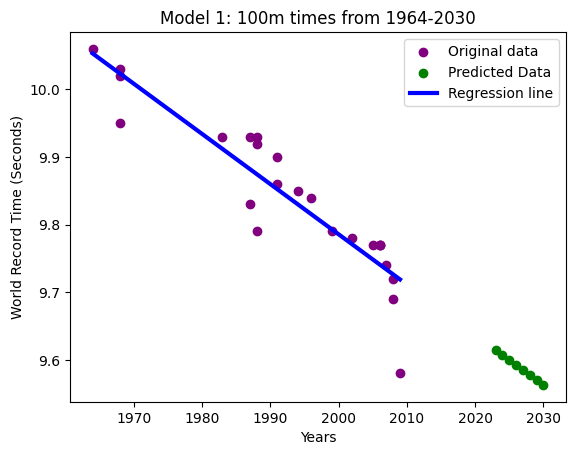

In [18]:
#professor notes
plt.scatter(x, y,  color='purple', label="Original data")
plt.scatter(df_predicted['Date'], df_predicted['Time'],  color='green', label="Predicted Data")
m, b = np.polyfit(df_pred['Date'],df_pred['Time'],1)
plt.plot(x, m*x + b, color='blue', linewidth=3, label = "Regression line")
plt.xlabel('Years')
plt.ylabel('World Record Time (Seconds)')
plt.title("Model 1: 100m times from 1964-2030")
plt.legend(loc=1)
plt.show()

In [19]:
reg.coef_
reg.intercept_
reg.score(x, y)
print("Beta 0 (Constants) = ", reg.intercept_, ", Beta 1 (coefficient) = ", reg.coef_, ", R-Sqaured =", reg.score(x, y))

Beta 0 (Constants) =  [24.64808957] , Beta 1 (coefficient) =  [[-0.00743113]] , R-Sqaured = 0.8364108726448357


In [20]:
df_new = df_old.drop(23) #Dropping the outlier from original dataset
#New regression without the outlier
x_new =np.array(df_new[['Date']]).reshape(-1,1)
y_new = df_new['Time']
reg_new = LinearRegression()
reg_new
reg_new.fit(x_new,y_new)

LinearRegression()

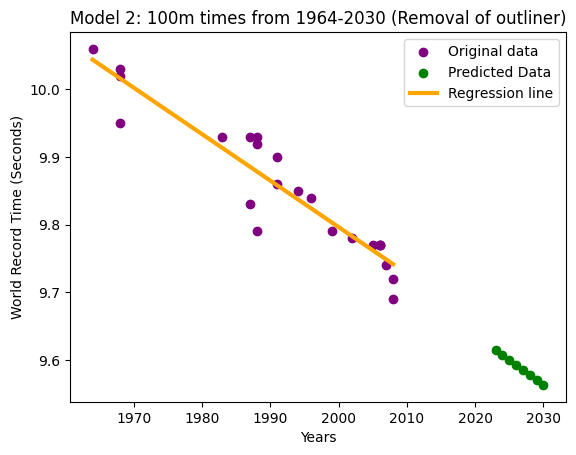

In [21]:
#New Plot without the outliner
plt.scatter(df_new['Date'], df_new['Time'],  color='purple', label="Original data")
plt.scatter(df_predicted['Date'], df_predicted['Time'],  color='green', label="Predicted Data")
m_n, b_n = np.polyfit(df_new['Date'],df_new['Time'],1)
plt.plot(x_new, m_n*x_new + b_n, color = 'orange', linewidth=3, label = "Regression line")
plt.legend(loc=1)
plt.xlabel('Years')
plt.ylabel('World Record Time (Seconds)')
plt.title("Model 2: 100m times from 1964-2030 (Removal of outliner)")
plt.show()


In [22]:
reg_new.coef_
reg_new.intercept_
reg_new.score(x_new, y_new)
print("Beta 0 (Constants) = ", reg_new.intercept_, ", Beta 1 (coefficient) = ", reg_new.coef_, ", R-Sqaured =", 
      reg_new.score(x_new, y_new))

Beta 0 (Constants) =  23.55124605489194 , Beta 1 (coefficient) =  [-0.00687737] , R-Sqaured = 0.8778574177629349


In [23]:
#Model with outlier
x = sm.add_constant(x)
model_old = sm.OLS(y, x)
results_old = model_old.fit()
print(results_old.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     112.5
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           4.10e-10
Time:                        20:54:01   Log-Likelihood:                 39.999
No. Observations:                  24   AIC:                            -76.00
Df Residuals:                      22   BIC:                            -73.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.6481      1.396     17.656      0.0

In [24]:
#Model without outlier
x_new = sm.add_constant(x_new)
model_new = sm.OLS(y_new,x_new)
results_new = model_new.fit()
print(results_new.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     150.9
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           4.71e-11
Time:                        20:54:02   Log-Likelihood:                 44.278
No. Observations:                  23   AIC:                            -84.56
Df Residuals:                      21   BIC:                            -82.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.5512      1.115     21.123      0.0